<a href="https://colab.research.google.com/github/praxxyy14/Advance-Python-/blob/main/Neural_Network_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
url="https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/PowerPlant.csv"
print(url)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/PowerPlant.csv


In [3]:
import pandas as pd
df= pd.read_csv(url)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [6]:
df.isna().sum()

,0
AT,0
V,0
AP,0
RH,0
PE,0


In [7]:
df.duplicated().sum()

41

In [8]:
df.drop_duplicates(keep="first").reset_index(drop=True)
df.shape

(9568, 5)

In [9]:
df

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9563,15.12,48.92,1011.80,72.93,462.59
9564,33.41,77.95,1010.30,59.72,432.90
9565,15.99,43.34,1014.20,78.66,465.96
9566,17.65,59.87,1018.58,94.65,450.93


In [10]:
X = df.drop(columns= ["PE"])
Y = df["PE"]

In [14]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [13]:
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


In [15]:
X.dtypes

,0
AT,float64
V,float64
AP,float64
RH,float64


In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [17]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler()
).set_output(transform="pandas")

In [19]:
X_pre = num_pipe.fit_transform(X)
X_pre

,AT,V,AP,RH
0,-1.517862,-1.065205,-0.407357,1.143944
1,0.535255,0.329277,-0.313057,0.061031
2,1.353818,0.204151,-1.028729,-2.150688
3,-0.077996,-0.363242,-1.016941,0.238434
4,-1.053562,-1.073861,0.651838,1.636427
...,...,...,...,...
9563,-0.608049,-0.423838,-0.245699,-0.025958
9564,1.846298,1.860689,-0.498289,-0.930783
9565,-0.491303,-0.862958,0.158445,0.366521
9566,-0.268547,0.437876,0.896008,1.461763


In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_pre,Y,test_size=0.2,random_state=1)

In [21]:
X_train.head()

,AT,V,AP,RH
9061,0.613086,0.611793,1.561162,-0.857493
6937,-0.460439,-0.625298,1.141863,1.261757
5631,1.453120,1.238208,-0.425880,-1.343126
6218,-0.752975,-1.060483,-0.720569,0.598035
1362,-1.945930,-1.120292,-0.166554,-0.684885


In [22]:
X_test.head()

,AT,V,AP,RH
5014,-0.248418,-0.833054,-0.766035,0.355561
6947,1.335032,1.324773,-0.302953,-1.412307
9230,-1.152863,-1.384708,1.416344,0.488443
4290,1.396760,1.018648,0.736035,-1.350661
6477,0.030699,-0.572572,-0.166554,1.279565


In [23]:
Y_train.head()

,PE
9061,449.11
6937,460.73
5631,429.85
6218,469.75
1362,495.35


In [24]:
Y_test.head()

,PE
5014,458.92
6947,430.55
9230,473.85
4290,435.02
6477,456.44


In [26]:
X_train.shape

(7654, 4)

In [27]:
X_test.shape

(1914, 4)

In [29]:
X_train.shape[1]

4

In [30]:
from keras.models import Sequential
from keras.layers import Input,Dense

In [31]:
model1= Sequential(
     [
         Input(shape=(X_train.shape[1],)),
         Dense(8,activation="relu"),
         Dense(4,activation="relu"),
         Dense(1,activation="linear")
     ]
  )

In [34]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

In [35]:
model1.compile(loss="mse",optimizer="adam",metrics=["mae"])

In [36]:
history=model1.fit(X_train,Y_train,epochs=100,validation_split=0.2)

Epoch 1/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 206589.8438 - mae: 454.2086 - val_loss: 204309.9531 - val_mae: 451.7041
Epoch 2/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 202417.4219 - mae: 449.6465 - val_loss: 195815.0469 - val_mae: 442.3282
Epoch 3/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 191074.4531 - mae: 436.9438 - val_loss: 175706.6250 - val_mae: 418.9530
Epoch 4/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 167802.5156 - mae: 409.0549 - val_loss: 144214.0625 - val_mae: 377.6984
Epoch 5/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 134497.4062 - mae: 363.0306 - val_loss: 109193.5078 - val_mae: 321.1097
Epoch 6/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 100411.3906 - mae: 303.7021 - val_loss: 80598.8906 - val_mae: 260.5742
Epoch 7/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 73105.9297 - mae: 243.6129 - val_loss: 60647.1914 - val_mae: 218.6752
Epoch 8/100
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 55571.7930 

In [37]:
import matplotlib.pyplot as plt


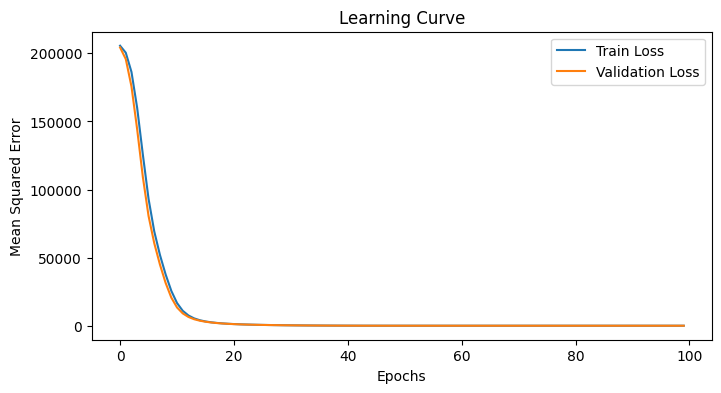

In [40]:
plt.figure(figsize=(8,4))
plt.plot(history.history["loss"],label="Train Loss")
plt.plot(history.history["val_loss"],label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curve")
plt.legend()
plt.show()

In [41]:
model1.evaluate(X_train,Y_train)

240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 20.4582 - mae: 3.5507


[20.436019897460938, 3.5579164028167725]

In [42]:
model1.evaluate(X_test,Y_test)

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 18.4196 - mae: 3.4512


[19.238813400268555, 3.5064165592193604]

In [43]:
from sklearn.metrics import(
    root_mean_squared_error, mean_absolute_error , mean_absolute_percentage_error , r2_score
)

In [44]:
def evaluate_model(model1, x , y):
    y_pred = model1.predict(x)
    rmse = root_mean_squared_error(y,y_pred)
    mae = mean_absolute_error(y,y_pred)
    mape = mean_absolute_percentage_error(y,y_pred)
    r2 = r2_score(y,y_pred)
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"MAPE : {mape:.2%}")
    print(f"R2 Score : {r2:.2%}")

In [48]:

print("Train Results :")
evaluate_model(model1, X_train, Y_train)

Train Results :
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
RMSE : 452.06%
MAE : 355.79%
MAPE : 0.78%
R2 Score : 92.98%


In [49]:
print("Test Results :")
evaluate_model(model1, X_test, Y_test)

Test Results :
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
RMSE : 438.62%
MAE : 350.64%
MAPE : 0.77%
R2 Score : 93.42%


In [51]:
ypred_test = model1.predict(X_test)
ypred_test[0:5]

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[459.7778 ],
       [434.66595],
       [475.05957],
       [434.87344],
       [452.24576]], dtype=float32)

In [52]:
  Y_test.head()

,PE
5014,458.92
6947,430.55
9230,473.85
4290,435.02
6477,456.44


In [45]:
url2 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/test_PowerPlant.csv"
print(url2)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/test_PowerPlant.csv


In [53]:

xnew = pd.read_csv(url2)
xnew.head()

,AT,V,AP,RH
0,22.49,58.82,1009.73,85.19
1,28.88,54.89,1007.16,46.60
2,27.89,73.21,1001.32,85.88
3,25.69,62.26,1011.38,74.08
4,12.16,40.81,1025.79,70.97


In [54]:
xnew.shape

(100, 4)

In [55]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [56]:

xnew_pre = num_pipe.transform(xnew)
xnew_pre.head()

,AT,V,AP,RH
0,0.380936,0.355246,-0.594274,0.813796
1,1.238415,0.045974,-1.027045,-1.829444
2,1.105566,1.487673,-2.010463,0.861058
3,0.810346,0.625958,-0.316424,0.052812
4,-1.005253,-1.062057,2.110125,-0.160209


In [58]:

preds = model1.predict(xnew_pre)
preds[0:5]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


array([[445.0642 ],
       [438.54123],
       [429.48978],
       [440.3986 ],
       [473.3347 ]], dtype=float32)

In [59]:
xnew["PE_pred"] = preds

In [60]:
xnew

,AT,V,AP,RH,PE_pred
0,22.49,58.82,1009.73,85.19,445.064209
1,28.88,54.89,1007.16,46.60,438.541229
2,27.89,73.21,1001.32,85.88,429.489777
3,25.69,62.26,1011.38,74.08,440.398590
4,12.16,40.81,1025.79,70.97,473.334686
...,...,...,...,...,...
95,26.35,69.48,1008.45,70.47,437.722687
96,11.78,39.96,1011.37,82.95,472.025726
97,5.62,41.38,1020.91,86.21,484.259674
98,24.96,74.99,1008.25,80.52,436.317291


In [61]:

xnew.to_csv("Results.csv", index=False)